In [1]:
from neuron import h
from neuron.units import ms, mV
%matplotlib notebook

In [2]:
h.load_file('stdrun.hoc')

1.0

In [3]:
class BallAndStick:
    def __init__(self, gid):
        self._gid = gid
        self._setup_morphology()
        self._setup_biophysics()
    def _setup_morphology(self):
        self.soma = h.Section(name='soma', cell=self)
        self.dend1 = h.Section(name='dend', cell=self)
        self.dend2 = h.Section(name='dend', cell=self)
        self.all = [self.soma, self.dend1, self.dend2]
        self.dend1.connect(self.soma(0))
        self.dend2.connect(self.soma(1))
        self.soma.L = self.soma.diam = 18.8
        
        self.dend1.L = 701.9
        self.dend1.diam = 3.18
        self.dend1.nseg = 5
        
        self.dend2.L = 549.1
        self.dend2.diam = 2.0
        self.dend2.nseg = 5
    def _setup_biophysics(self):
        for sec in self.all:
            sec.Ra = 123    # Axial resistance in Ohm * cm
#             sec.cm = 1      # Membrane capacitance in micro Farads / cm^2
        self.soma.insert('hh') 
#         self.dend.insert('pas')
        for seg in self.soma:
            seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
            seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
            seg.hh.gl = 0.0003    # Leak conductance in S/cm2
            seg.hh.el = -54.3     # Reversal potential in mV
#         for seg in self.dend:
#             seg.hh.gnabar = 0.12  # Sodium conductance in S/cm2
#             seg.hh.gkbar = 0.036  # Potassium conductance in S/cm2
#             seg.hh.gl = 0.0003    # Leak conductance in S/cm2
#             seg.hh.el = -54.3     # Reversal potential in mV
        # Insert passive current in the dendrite                       # <-- NEW
        self.dend1.insert('pas')                                        # <-- NEW
        for seg in self.dend1:                                          # <-- NEW
            seg.pas.g = .0001667 # Passive conductance in S/cm2          # <-- NEW
            seg.pas.e = -60    # Leak reversal potential mV            # <-- NEW 
            
        self.dend2.insert('pas')                                        # <-- NEW
        for seg in self.dend2:                                          # <-- NEW
            seg.pas.g = .0001666  # Passive conductance in S/cm2          # <-- NEW
            seg.pas.e = -60    # Leak reversal potential mV            # <-- NEW 
    def __repr__(self):
        return 'BallAndStick[{}]'.format(self._gid)

my_cell = BallAndStick(0)

In [4]:
h.topology()


|-|       BallAndStick[0].soma(0-1)
   `----|       BallAndStick[0].dend(0-1)
 `----|       BallAndStick[0].dend(0-1)



1.0

<IPython.core.display.Javascript object>


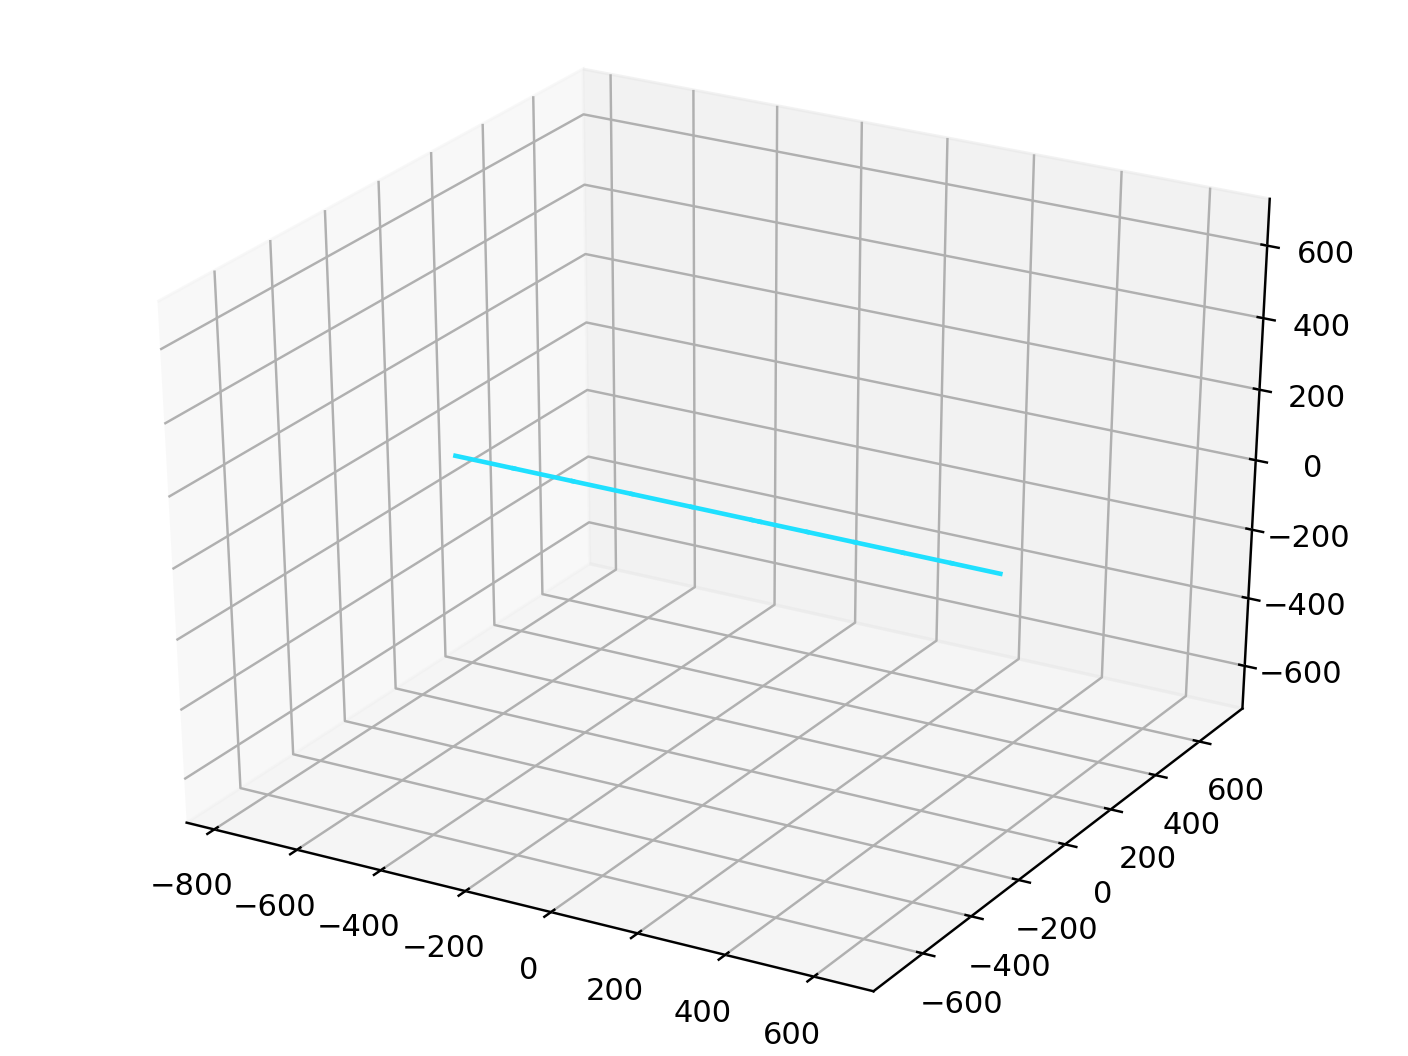

<neuron._PlotShapePlot.__call__.<locals>._get_pyplot_axis3d.<locals>.Axis3DWithNEURON at 0x1196496a0>

In [5]:
import matplotlib.pyplot as plt

h.PlotShape(False).plot(plt)

In [9]:
from neuron import gui
ps = h.PlotShape(True)
# use 1 instead of 0 to hide diams
ps.show(0)

1.0

In [ ]:
for sec in h.allsec():
    print('%s: %s' % (sec, ', '.join(sec.psection()['density_mechs'].keys())))

# Stimulation on Soma

In [11]:
stim = h.MyClamp(my_cell.soma(0.5))
stim.get_segment()

NameError: name 'MyClamp' is not defined